In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import RobustScaler

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings("ignore")
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

In [96]:
data = pd.read_csv("Iris.csv")
df = data.copy()

# Data Preprocessing

In [97]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [98]:
df.drop(["Id"], axis=1, inplace = True)

In [99]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [100]:
k_means = KMeans(n_clusters=3).fit(df.drop("Species", axis = 1))
hc = AgglomerativeClustering(n_clusters=3).fit_predict(df.drop("Species", axis = 1))

In [101]:
print(k_means.labels_, hc, sep = "\n")

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 0 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [102]:
df["KMeans Clustering"] = k_means.labels_
df["Hierarchical Clustering"] = hc

In [103]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,KMeans Clustering,Agglomerative Clustering
0,5.1,3.5,1.4,0.2,Iris-setosa,1,1
1,4.9,3.0,1.4,0.2,Iris-setosa,1,1
2,4.7,3.2,1.3,0.2,Iris-setosa,1,1
3,4.6,3.1,1.5,0.2,Iris-setosa,1,1
4,5.0,3.6,1.4,0.2,Iris-setosa,1,1
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,2,2
146,6.3,2.5,5.0,1.9,Iris-virginica,0,0
147,6.5,3.0,5.2,2.0,Iris-virginica,2,2
148,6.2,3.4,5.4,2.3,Iris-virginica,2,2


In [104]:
df.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [105]:
df["KMeans Clustering"].replace({2:"Iris-setosa", 1:"Iris-versicolor", 0:"Iris-virginica"}, inplace = True)
df["Hierarchical Clustering"].replace({2:"Iris-virginica", 1:"Iris-setosa", 0:"Iris-versicolor"}, inplace = True)

df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,KMeans Clustering,Agglomerative Clustering
0,5.1,3.5,1.4,0.2,Iris-setosa,Iris-versicolor,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa,Iris-versicolor,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa,Iris-versicolor,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa,Iris-versicolor,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa,Iris-versicolor,Iris-setosa
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,Iris-setosa,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica,Iris-virginica,Iris-versicolor
147,6.5,3.0,5.2,2.0,Iris-virginica,Iris-setosa,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica,Iris-setosa,Iris-virginica


In [106]:
difflib.SequenceMatcher(None, df["Species"], df["KMeans Clustering"]).ratio()

0.6666666666666666

In [107]:
difflib.SequenceMatcher(None, df["Species"], df["Hierarchical Clustering"]).ratio()

0.8133333333333334

# PCA

In [108]:
pca = PCA(n_components = 1)

In [109]:
sepal_pca = pca.fit_transform(X=df[["SepalLengthCm","SepalWidthCm"]])
sepal_pca = pd.DataFrame(data = sepal_pca, columns=["Original Sepal"])

petal_pca = pca.fit_transform(X=df[["PetalLengthCm", "PetalWidthCm"]])
petal_pca = pd.DataFrame(data = petal_pca, columns=["Original Petal"])

In [110]:
df_pca = pd.concat([sepal_pca, petal_pca, df[["Species", "Hierarchical Clustering", "KMeans Clustering"]]], axis = 1)

In [111]:
df_pca

,Original Sepal,Original Petal,Species,Agglomerative Clustering,KMeans Clustering
0,-0.775925,-2.561371,Iris-setosa,Iris-setosa,Iris-versicolor
1,-0.936225,-2.561371,Iris-setosa,Iris-setosa,Iris-versicolor
2,-1.151248,-2.653526,Iris-setosa,Iris-setosa,Iris-versicolor
3,-1.243124,-2.469217,Iris-setosa,Iris-setosa,Iris-versicolor
4,-0.883437,-2.561371,Iris-setosa,Iris-setosa,Iris-versicolor
...,...,...,...,...,...
145,0.858266,1.755868,Iris-virginica,Iris-virginica,Iris-setosa
146,0.498579,1.416251,Iris-virginica,Iris-versicolor,Iris-virginica
147,0.658878,1.639388,Iris-virginica,Iris-virginica,Iris-setosa
148,0.328526,1.940177,Iris-virginica,Iris-virginica,Iris-setosa


Text(0.5, 1.0, 'Result of Agglomerative Clustering')

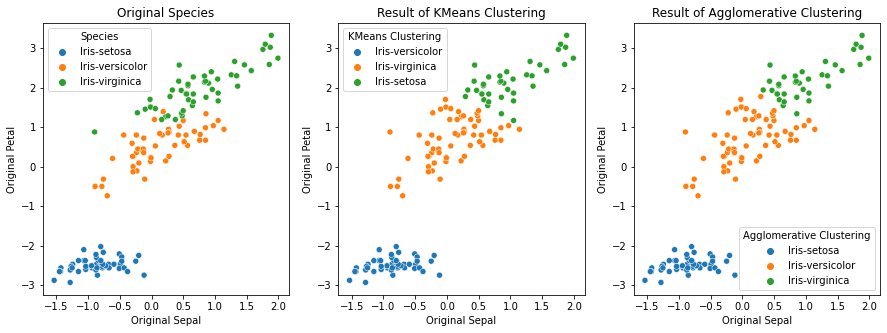

In [113]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.scatterplot(x = df_pca["Original Sepal"], y = df_pca["Original Petal"], data = df_pca, hue = "Species")
plt.title("Original Species")

plt.subplot(1,3,2)
sns.scatterplot(x = df_pca["Original Sepal"], y = df_pca["Original Petal"], data = df_pca, hue = "KMeans Clustering")
plt.title("Result of KMeans Clustering")

plt.subplot(1,3,3)
sns.scatterplot(x = df_pca["Original Sepal"], y = df_pca["Original Petal"], data = df_pca, hue = "Hierarchical Clustering")
plt.title("Result of Hierarchical Clustering")